#### ROI(Region Of Interest) 지정 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('img/sunset.jpg') # (338, 600, 3)
img2 = img.copy()
x, y, w, h = [320, 150, 50 , 50]  

roi = img[y:y+h, x:x+h]

cv2.rectangle(roi, (0,0), (w-1, h-1), (0,255,0))
cv2.imshow("img", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 예제) copy 함수를 이용해 관심영역 복제 및 새창(roi) 띄우기 

In [6]:
img = cv2.imread('img/sunset.jpg') # (338, 600, 3)
img2 = img.copy()

roi = img[y:y+h, x:x+h]
obj = roi.copy()

cv2.imshow("roi", obj)


img2[y:y+h, x+w:x+w+w] = obj

roi2 = img2[y:y+h, x:x+w+w]

cv2.rectangle(roi, (0,40), (w-1, h-1), (0,255,0))  # x축 pt는 오른쪽이 +, y축 pt는 아래쪽이 +
cv2.rectangle(roi, (0,0), (w-1, h-1), (0,255,0))
cv2.imshow("img", img)


cv2.rectangle(roi2, (0,0), (2*w-1, h-1), (255,255,0))
cv2.imshow("img2", img2)




cv2.waitKey(0)
cv2.destroyAllWindows()

### 마우스로 관심영역 지정 (실습x)

In [11]:
import cv2
import numpy as np

isDragging = False                      # 마우스 드래그 상태 저장 
x0, y0, w, h = -1,-1,-1,-1              # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)         # 색상 값 

def onMouse(event,x,y,flags,param):     # 마우스 이벤트 핸들 함수  ---①
    global isDragging, x0, y0, img      # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 ---②
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임 ---③
        if isDragging:                  # 드래그 진행 중
            img_draw = img.copy()       # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업 ---④
        if isDragging:                  # 드래그 중지
            isDragging = False          
            w = x - x0                  # 드래그 영역 폭 계산
            h = y - y0                  # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            if w > 0 and h > 0:         # 폭과 높이가 음수이면 드래그 방향이 옳음 ---⑤
                img_draw = img.copy()   # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2) 
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정 ---⑥
                cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장 ---⑦
                print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림ㅇㅣ 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread('img/sunset.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록 ---⑧
cv2.waitKey()
cv2.destroyAllWindows()

x:325, y:167, w:51, h:25
croped.


### 마우스 이벤트 코드없이 간단히 ROI 지정
* ret = cv2.selectROI([win_name,] img[, showCrossHair = True, fromCenter=False])
    - win_name : ROI 선택을 진행할 창의 이름, str
    - img : ROI 선택을 진행할 이미지, Numpy ndarray
    - showCrossHair : 선택 영역 중심에 십자 모양 표시 여부
    - fromCenter : 마우스 시작 지점을 영역의 중심으로 지정
    - ret : 선택한 영역 좌표 와 크기(x, y, w, h) 선택을 취소한 경우 모두 0 
        - 'c'키를 누르면 선택 취소

In [1]:
img = cv2.imread('img/sunset.jpg')

x,y,w,h  = cv2.selectROI('img', img, False)
if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
    cv2.moveWindow('cropped', 900, 500) 
    cv2.imwrite('cropped2.jpg', roi)   # ROI 영역만 파일로 저장

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 스레시홀딩
(1) 바이너리 이미지 : 
    - 검은색과 흰색만으로 표현한 것을 바이너리(binary, 이진화)이미지
    - 원하는 모양을 좀 더 정확하게 판단 할 수 있다.
    - 0 과 1 or 0 과 255를 사용 
    
    
(2) 그레이 스케일이미지
    - 0 ~ 255 사이의 픽셀로 표현
    - 연산의 양을 줄일때 사용
    
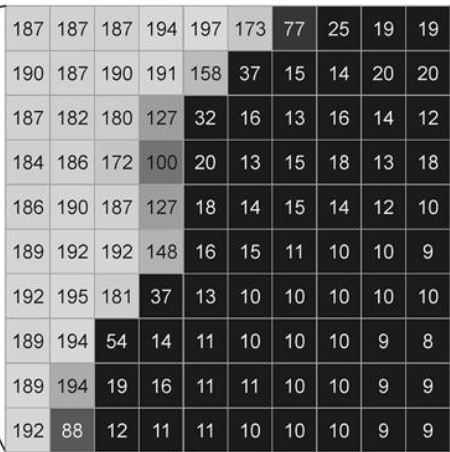
    
                                            값으로 명암을 표현할 수 없고, 점의 밀도로 명암표현

 


#### 스레시홀딩

스레시홀딩(thresholding)이란 경계점을 기준으로 두가지 분류로 나누는 것으로 바이너리 이미지를 만드는 가장 대표적인 방법

* ret, out = cv2.threshold(img, threshold, value, type_flag) 
    * Numpy 배열, 변환할 이미지 
    * threshold : 경계 값 
    * value : 경계 값 기준에 만족하는 픽셀에 적용할 값 
    * type_flag : 스레시홀드 적용 방법 지정 
        * - cv2.THRESH_BINARY : 픽셀 값이 경계 값을 넘으면 value 값을 지정하고 넘지 못하면 0 지정 
        * - cv2.THRESH_BINARY_INV : ‘cv2.THRESH_BINARY ’의 반대 
        * - cv2.THRESH_TRUNC : 픽셀 값이 경계 값을 넘으면 value 값을 지정하고 넘지 못하면 유지
        * - cv2.THRESH_TOZERO : 픽셀 값이 경계값을 넘으면 유지, 아니면 0 
        * - cv2.THRESH_TOZERO_INV : ‘cv2.THRESH_TOZERO’의 반대 
    * ret : 스레시홀딩에 사용한 경계값 
    * out : 결과 바이너리 이미지

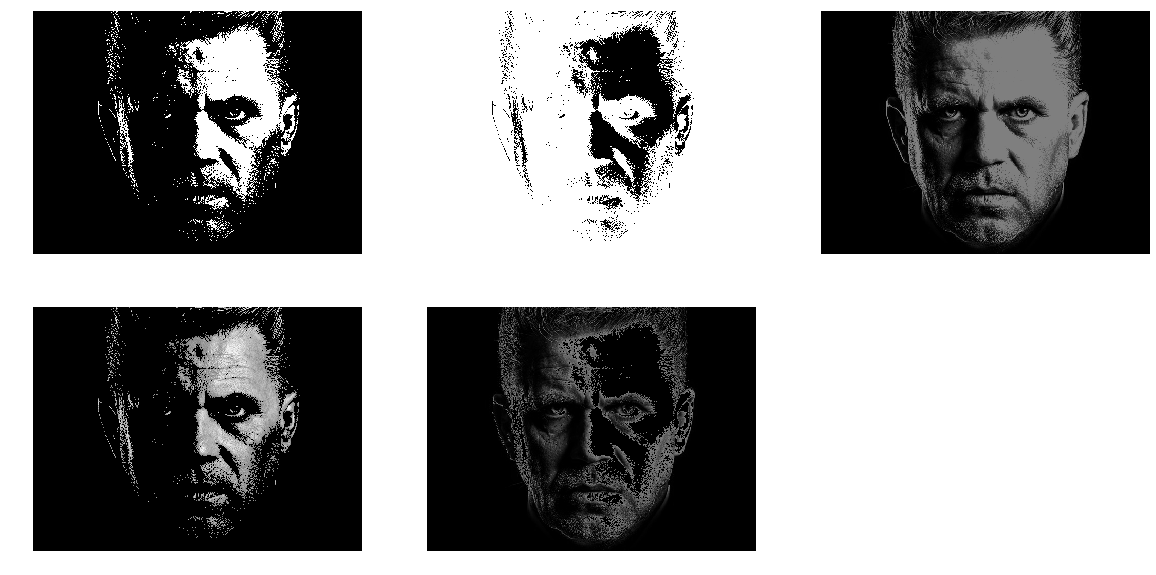

In [27]:
%matplotlib inline
img = cv2.imread('img/man_face.jpg', cv2.IMREAD_GRAYSCALE)

imgs = []
ret, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
imgs.append(t_bin)
imgs.append(t_bininv)
imgs.append(t_truc)
imgs.append(t_2zr)
imgs.append(t_2zrinv)

pnum = 0
plt.figure(figsize=(20,10))
for i in imgs:
    pnum+=1
    plt.subplot(2,3,pnum)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    
plt.show()

## 컬러스페이스
**RGB (row , column , channel)**
**RGBA (row, column, channel, alpha) : 배경을 투명 처리하기 위함**

- mode_flag
    - cv2.IMREAD_COLOR : BGR스케일로 읽기, 기본 값 => 그대로 읽기
        - cv2.IMREAD_UNCHANGED : 파일 그대로 읽기 => 알파 채널을 가지고 있다면 BGRA로 읽기  
          -> 알파 채널을 통해 전경과 배경 분리할 수 있어 **mask channel** 이라고도 부름

color (120, 98, 3) unchanged (120, 98, 4)


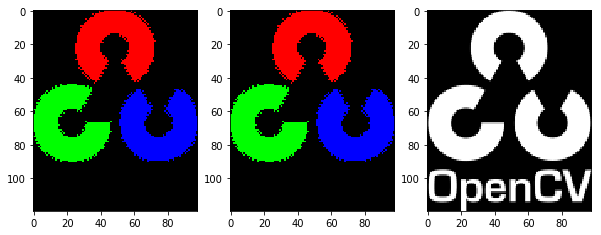

In [23]:
bgr = cv2.imread('img/opencv_logo.png', cv2.IMREAD_COLOR)    
bgra = cv2.imread('img/opencv_logo.png', cv2.IMREAD_UNCHANGED) 

print("color", bgr.shape, "unchanged", bgra.shape) 

pltset = {1:bgr, 2:bgra, 3:bgra[:,:,3]}


cnt = 0
plt.figure(figsize=(10,10))
for cnt, img in pltset.items():
    plt.subplot(1,3, cnt)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    
# plt.show()

* out = cv2.cvtColor(img, flag)
    - img : Numpy 배열 이미지
    - flag : 변환할 컬러 스페이스(총 274개)
        - cv2.COLOR_BGR2GRAY : BGR컬러를 그레이 스케일로
        - cv2.COLOR_GRAY2BGR : 그레이 스케일 이미지를 BGR 컬러 이미지로 변환
        - cv2.COLOR_BGR2HSV : BGR 컬러 이미지를 HSV 컬러 이미지
        등 (YUV, BGR, HSV간 변경 가능)
    - out : 변환한 결과 이미지 

### HSV ( H : 색조, S : 채도, V : 명도)
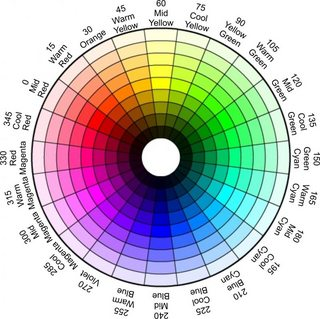

RGB 색상의 범위에 맞는 H값
* 빨강 : 165 ~ 180, 0 ~ 15
* 초록 : 45 ~ 75 
* 파랑 : 90 ~ 120 

S값은 색상의 순수한 정도를 나타내며 255가 가장 순수한 색상

V값은 명도로서 밝은 정도를 나타내며 255가 가장 밝음

**H값 한가지로 색상을 확인 할 수 있어 색상 기반 작업에 효과적**

#### BGR에서 HSV로 변환

In [29]:
import cv2
import numpy as np

#---① BGR 컬러 스페이스로 원색 픽셀 생성
red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)   # 빨강 값만 갖는 픽셀
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8) # 초록 값만 갖는 픽셀
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)  # 파랑 값만 갖는 픽셀
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8) # 노랑 값만 갖는 픽셀

#---② BGR 컬러 스페이스를 HSV 컬러 스페이스로 변환
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);

#---③ HSV로 변환한 픽셀 출력
print("red:",red_hsv)
print("green:", green_hsv)
print("blue", blue_hsv)
print("yellow", yellow_hsv)

red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


### 적응형 스레시홀드(P95)
#### * cv2.adaptiveThreshold(img, value, method, type_flag, block_size, C)  
: method에 따라 임계값을 결정 ( 전체픽셀이 하나의 기준이 아니라 영역에 따라 다른 임계값사용) 
    * img : 입력 영상
    * value : 경계 값을 만족하는 픽셀에 적용할 값 
    * method : 경계 값 결정 방법 
        * cv2.ADPTIVE_THRESH_MEAN_C : 이웃 픽셀의 평균으로 설정
        * cv2.ADPTIVE_THRESH_CAUSSIAN_C : 가우시안 분포에 따른 가중치의 합으로 결정 
    * type_flag : 스레시홀드 적용 방법 지정 (cv2.threshold() 함수와 동일) 
    * blosck_size : 영역으로 나눌 이웃의 크기 (nxn), 홀수(3,5,7,…)
    * C : 계산된 경계 값 결과에서 가감할 상수( 음수가능) 

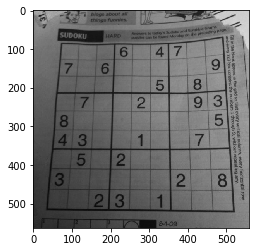

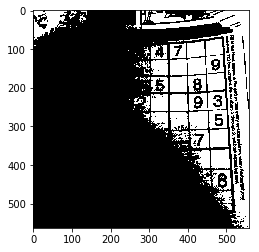

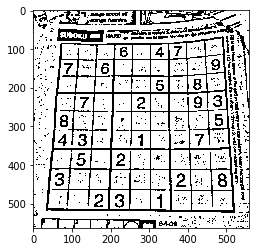

In [30]:
import cv2 

image = cv2.imread('img/sudoku.png', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) 
th2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                            cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(th1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(th2, cv2.COLOR_GRAY2RGB)) 
plt.show()

#### 오츠(Otsu) 알고리즘(p106)
ret, t_img = cv2.threshold(img, 0, 255, cv.THRESH_BINARY | **cv2.THRESH_OTSU**) 
    - ret : 실행후 결과값 (경계 반환값)

otsu threshold: 131.0


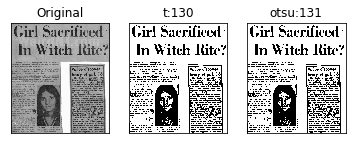

In [31]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE) 
# 경계 값을 130으로 지정  ---①
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)        
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값(ret) 출력

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
#enumerate : 튜플형태로 인덱스번호와 원소를 같이 출력
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([]) 

plt.show()

### 이미지연산
* image.shape : 이미지 크기 확인
* image.size : 이미지 픽셀 수 확인
* image[000,000] : 특정 픽셀을 지정합니다

#### 이미지정보 확인

#### 픽셀값 바꿔보기(p59)

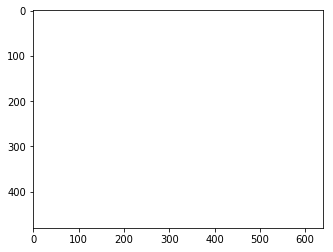

In [146]:
image = np.full((480, 640, 3), 255, np.uint8)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 480 X 640 X 3 넘파이 채널을 만들고 (0, 0, 255) 값

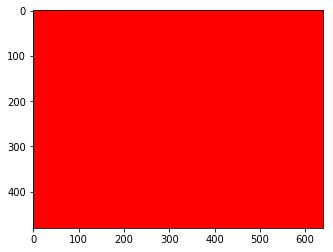

In [147]:
image = np.full((480, 640, 3), (0,0,255), np.uint8)  # BGR
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 값을 0으로 채우기 

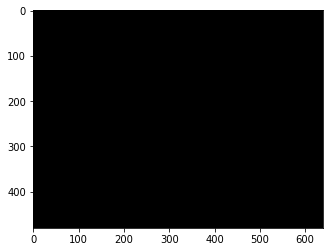

In [195]:
image = np.full((480, 640, 3), (0,0,0), np.uint8)  # BGR
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 가로전체, 세로전체에 대한 픽셀에서 0번째 값을 255로 변경

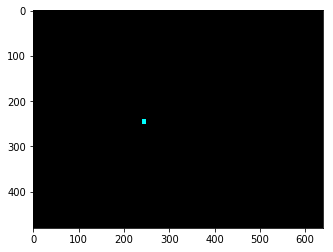

In [187]:
image[240:250, 240:250] = (255, 255, 0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


#### 세로선의 픽셀 바꿔보기

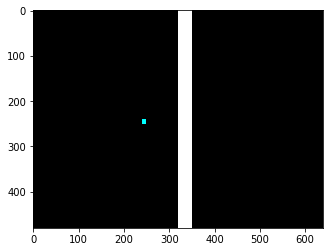

In [188]:
image[:,320:350,:] = 255
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 특정 영역 내 모든 픽셀, 두 번째 채널을 255로 설정

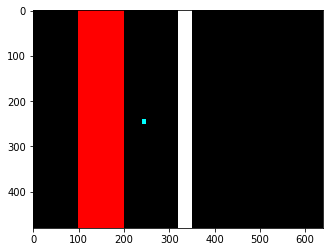

In [193]:
image[:480,100:200, 2] = 255
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 색상다루기

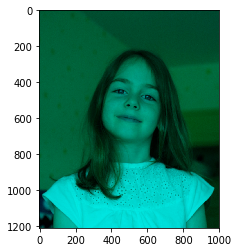

In [203]:
image = cv2.imread('img/image.jpg')
image[:,:,2] = 0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 예제) 특정부분에 R픽셀이 사라진 이미지 출력해보기

### 이미지 사이즈변경
* cv2.resize(image, (width, height), fx, fy, interpolation) : 이미지의 크기를 조절합니다. 
    * (width, height) : Manual Size 
    * fx : 가로 비율
    * fy : 세로 비율 
    * interpolation : 보간법 
        * INTER_CUBIC : 사이즈를 크게 할 때 주로 사용합니다. 
        * INTER_AREA : 사이즈를 작게 할 때 주로 사용합니다. 



* 보간법 : 사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법을 의미
    * 작은이미지를 큰이미지를 바꾸면 새로운 픽셀은 특정분포를 따르거나, 픽셀사이의 사이값

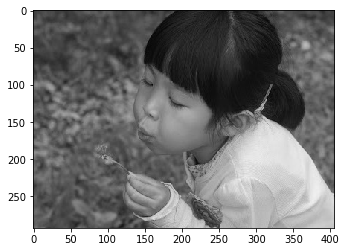

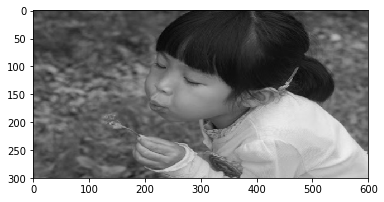

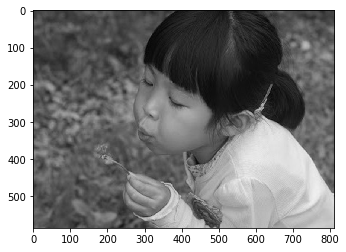

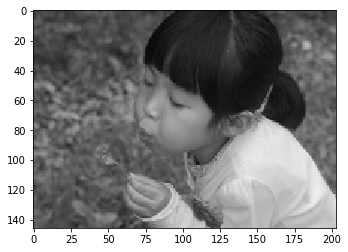

In [229]:
img = cv2.imread('img/girl.jpg')
img2 = cv2.resize(img, (600,300))
img3 = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation = cv2.INTER_CUBIC)
img4 = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#cv2.imwrite('girl_resize.jpg', im2)


plt_list = [img, img2, img3, img4]

for i in plt_list:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.show()



### 이미지자르기
* *[y1:y2, x1:x2]

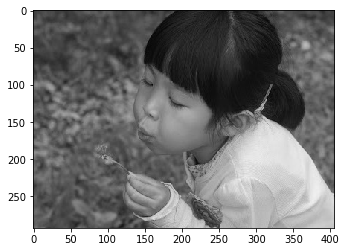

In [237]:
img = cv2.imread("img/girl.jpg")
img2 = img[0:200, 100:200]
img2 = cv2.resize(img, (406,293)) # (x방향 size, y방향 size) -> numpy array 랑 반대이므로 착각 x

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()


cv2.imshow("img", img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 합치기
* dest = cv2.add(src1, src2[, dest, mask, dtype]): src1과 src2 더하기 
    - src1 : 입력 영상(이미지) 1 또는 수 
    - src2 : 입력 영상(이미지) 2 또는 수
    - dest : 출력 영상
    - mask : 0이 아닌 픽셀만 연산
    - dtype : 출력 dtype 
    
* add 함수는 더하기 연산 시 255를 넘는 경우 거뭇거리거나, 하얗게 날아간 것 처럼 보인다.

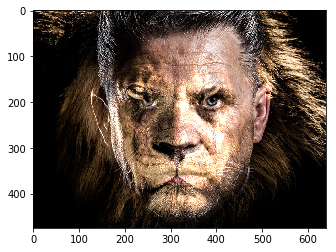

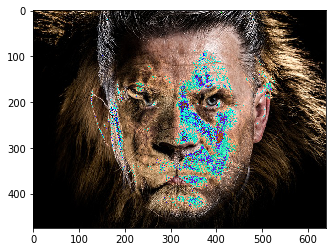

In [41]:
import cv2
import matplotlib.pyplot as plt

image_1 = cv2.imread('img/man_face.jpg')
image_2 = cv2.imread('img/lion_face.jpg')

result = cv2.add(image_1, image_2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

result2 = image_1 + image_2
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.show()

#### 알파블렌딩 (가중치를 조절하여 픽셀의 합이 255를 넘지 않게 한다.)
* cv2.addWeight(img1, alpha, img2, beta, gamma)
    - img1, img2 : 합성할 두 영상
    - alpha : img1에 지정할 가중치 
    - beta : img2에 지정할 가중치 (주로 1-alpha)
    - gamma : 연산 결과에 가감할 상수 (주로 0)

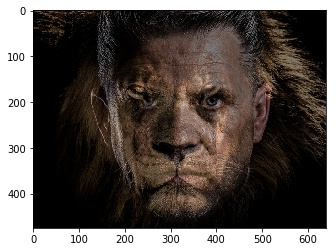

In [19]:
import cv2
import matplotlib.pyplot as plt

alpha = 0.5 # 합성에 사용할 알파 값

# 합성에 사용할 영상 읽기
img1 = cv2.imread('img/man_face.jpg')
img2 = cv2.imread('img/lion_face.jpg')


# addWeighted() 함수로 알파 블렌딩 적용
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0) 

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

#### 알파블렌딩, 트랙바 적용하기

In [19]:
import cv2
import numpy as np

win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---① 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, dst)


# ---② 합성 영상 읽기
img1 = cv2.imread('img/man_face.jpg')
img2 = cv2.imread('img/lion_face.jpg')

# ---③ 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

### 비트와이즈 연산
* bitwise_and(img1, img2, mask = None) : 각 픽셀에 대해 비트와이즈 AND 연산
* bitwise_or (img1, img2, mask = None) : 각 픽셀에 대해 비트와이즈 OR 연산
* bitwise_xor(img1, img2, mask  None) : 각 픽셀에 대해 비트와이즈 XOR 연산
* bitwise_not(img1, img2, mask  None) : 각 픽셀에 대해 비트와이즈 NOT 연산
    - img1, img2 : 연산 대상 영상, 동일한 shape
    - mask : 0이 아닌 픽셀만 연산, 바이너리 이미지 

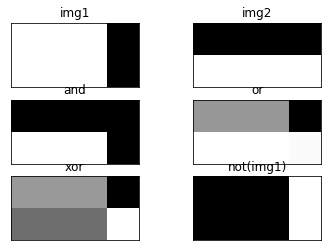

In [20]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 연산에 사용할 이미지 생성
img1 = np.zeros((200, 400), dtype=np.uint8)
img2 = np.zeros((200, 400), dtype=np.uint8)
img1[:,:300] = 150
img2[100:200, :] = 250

# 왼쪽은 검정색(0), 오른쪽은 흰색(255)
# 위쪽은 검정색(0), 아래쪽은 흰색(255)

#--② 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

#--③ Plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()): # itmes():key와 value를 한번에 출력
    plt.subplot(3,2,i+1) #subplot(행, 열, 위치)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

#### bitwise_and 연산으로 마스킹하기
* bitwise_and(img1, img2, mask = None) : 0으로 채워진 부분이 만나는 부분은 0으로 채워진다.
* bitwise_or (img1, img2, mask = None) : 255로 채워진 부분이 만나는 부분은 255로 채워진다. 
* bitwise_xor(img1, img2, mask None) : 다른 값을 가진 부분은 255, 같은 값을 가지면 0으로 채워진다. 
* bitwise_not(img1, img2, mask None) : 원래의 반대의 결과

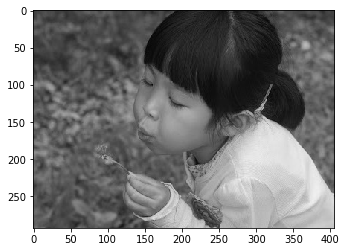

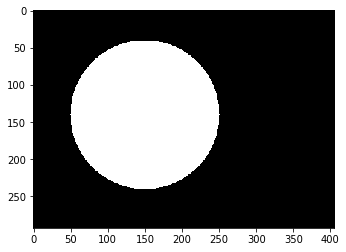

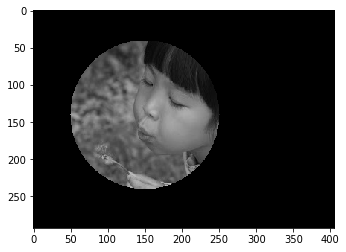

In [26]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('img/girl.jpg')

#--② 마스크 만들기
mask = np.zeros_like(img) # img와 사이즈가 같은 '0' numpy 행렬 생성 
cv2.circle(mask, (150,140), 100, (255,255,255), -1) # -- 특정좌표에 원 그리기 
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, mask)

#--④ 결과 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.show()

#### mask옵션 이용하기

In [ ]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('img/girl.jpg')
#--② 마스크 만들기
mask = np.zeros(img.shape[:2], dtype = np.uint8)
cv2.circle(mask, (150,140), 100, (255,255,255), -1) # -- 특정좌표에 원 그리기 

#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, img, mask = mask)

#--④ 결과 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.show()

### 차영상
* diff = cv2.absdiff(img1, img2)
    - img1, img2 : 입력 영상
    - diff : 두 영상의 차의 절대 값 반환

In [44]:
import numpy as np, cv2

#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('img/robot_arm1.jpg')
img2 = cv2.imread('img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#--⑤ 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

#### 이미지 합성과 마스킹

In [9]:
import cv2
import numpy as np

#--①
#합성에 사용할 이미지를 알파채널이 있게 열기 
img_fg = cv2.imread('img/opencv_logo.png', cv2.IMREAD_UNCHANGED)


#배경이미지 열기 

img_bg =cv2.imread('img/girl.jpg')

#--② 알파채널을 이용해서 마스크와 역마스크 생성

_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY)  # black(0), white(255)
mask_inv = cv2.bitwise_not(mask)

#--③ 전경 영상 크기로 배경 영상에서 ROI 잘라내기

img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)  # alpha channel 값 제거
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w]



#--④ 마스크 이용해서 오려내기 -> mask정보를 이용해 흰 부분을 통과함

masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask) 
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

cv2.imshow('img_fg', img_fg)


#--⑥ 이미지 합성

img_fuse = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = img_fuse


cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('fusion', img_fuse)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows() 

(120, 98, 4)


#### HSV 색상으로 마스킹
* dst = cv2.inRange(img, from, to ): 범위에 속하지 않은 픽셀 판단
    - img : 입력영상(이미지)
    - from: 범위의 시작 배열
    - to : 범위의 끝 배열
    - dst : img가 fromw ~ to 에 포함 되면 255, 아니면 0을 픽셀 값으로 하는 배열

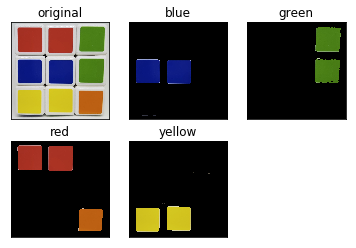

In [18]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

#### Open CV함수 이용해서 간편하게 합성하기 
* dst = cv2.seamlessClone(src, dst, mask, coords, flags[, output])
    - src : 입력영상, 일반적으로 전경
    - dst : 대상 영상, 일반적으로 배경
    - mask : 마스크, src에서 합성하고자 하는 영역은 255, 나머지는 0 
    - coodrs : src가 놓여지기 원하는 dst의 좌표(중앙)
    - flasgs: 합성 방식

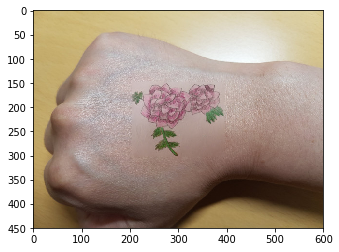

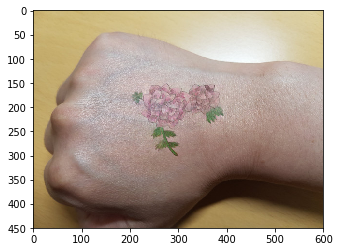

In [11]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
#--① 합성 대상 영상 읽기
img1 = cv2.imread("img/drawing.jpg")
img2= cv2.imread("img/my_hand.jpg")

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)
 
#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)
 
#--④ seamlessClone 으로 합성 
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

#--⑤ 결과 출력
plt.imshow(cv2.cvtColor(normal, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(mixed, cv2.COLOR_BGR2RGB))
plt.show()

## 히스토그램

* cv2.calcHist(img, channel, mask, histSize, ranges)
        - img : 입력 영상, [img]처럼 리스트 형태로 
        - channel : 처리할 채널 
            - 1채널 : [0], 2채널 : [1], 3채널 : [2]
        - mask : 마스크에 지정한 픽셀만 히스토그램 계산
        - histSize : 계급(bin)의 개수, 채널 개수에 맞게 리스트로 표현 
            - 1채널 : [256], 2채널 : [256, 256], 3채널 : [256, 256, 256]
        - ranges : 각 픽셀이 가질 수 있는 값의 범위 , RGB인 경우 [0, 256]

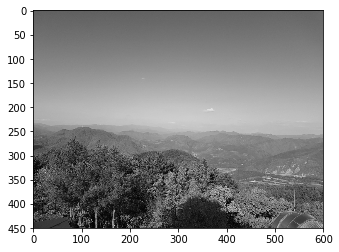

hist.shape: (255, 1)
hist.sum(): 270000.0 img.shape: (450, 600)


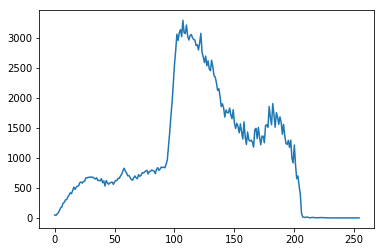

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 그레이 스케일로 읽기 및 출력
img = cv2.imread('img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#--② 히스토그램 계산 및 그리기
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)

print("hist.shape:", hist.shape)  #--③ 히스토그램의 shape (256,1)
print("hist.sum():", hist.sum(), "img.shape:",img.shape) #--④ 히스토그램 총 합계와 이미지의 크기
plt.show()

### 컬러 히스토그램 

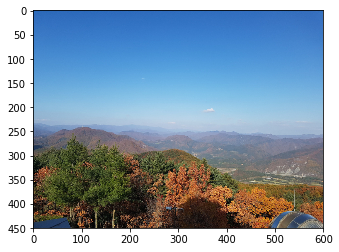

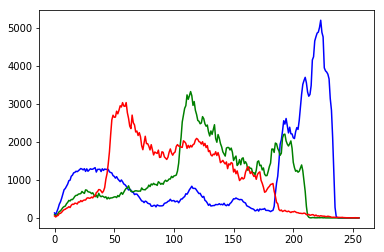

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 읽기 및 출력
img = cv2.imread('img/mountain.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#--② 히스토그램 계산 및 그리기
channels = cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()


### 노멀라이즈
    (1) 절대적인 기준을 만들어 준다.
    (2) 집중된 값을 전체 영역으로 골고루 분포하게 한다.
    
* dst = cv2.normalize(src, dst, alpha, beta, type_flag)
    - src : 노멀라이즈 이전 데이터
    - dst : 노멀라이즈 이후 데이터
    - alpha : 노멀라이즈 구간 1
    - beta : 노멀라이즈 구간 2(구간이 없을 경우 사용 안 함 )
    - type_flag : 알고리즘 선택 플래그 상수 
        - cv2.NORM_MINMAX : alpha와 beta 구간으로 노멀라이즈 
        - cv2.NORM_L1 
        - cv2.norm_l2
        - cv2.NORM_IMF 

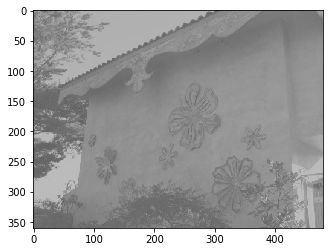

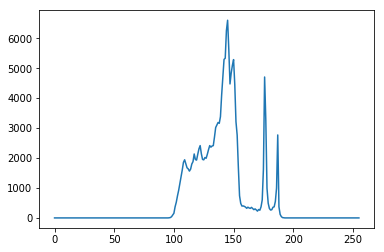

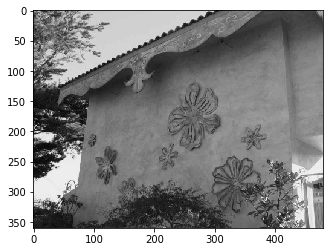

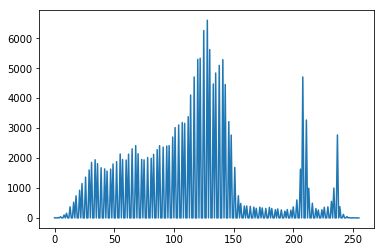

In [30]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 그레이 스케일로 영상 읽기
img = cv2.imread('img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

#--② OpenCV API를 이용한 정규화
img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

#--③ 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.plot(hist)
plt.show()
plt.imshow(cv2.cvtColor(img_norm, cv2.COLOR_BGR2RGB))
plt.show()
plt.plot(hist_norm)
plt.show()

### 예제) 모자이크 처리 
    - 모자이크 할 영역을 선택 (cv2.selectROI)
    - 선택 영역(roi)를 cv.resize함수를 이용해서 비율을 축소 
    - 다시 확대시에도 cv.resize함수를 이용하며 보간법시 interpolation=cv2.INTER_AREA 이

In [7]:
import cv2

rate = 15              # 모자이크에 사용할 축소 비율 (1/rate)
win_title = 'mosaic'    # 창 제목
img = cv2.imread('img/taekwonv1.jpg')    # 이미지 읽기

while True:
    x,y,w,h = cv2.selectROI(win_title, img, False) # 관심영역 선택
    if w and h:
        roi = img[y:y+h, x:x+w]   # 관심영역 지정
        
        roi = cv2.resize(roi, (w//rate, h//rate)) # 1/rate 비율로 축소
        
        
        roi = cv2.resize(roi, (w,h), interpolation=cv2.INTER_AREA)  # 원래 크기로 확대
        roi2 = cv2.resize(roi0, (w,h))
        
        
        img[y:y+h, x:x+w] = roi   # 원본 이미지에 적용
        
      
        cv2.imshow(win_title, img)
       
    else:
        break

cv2.destroyAllWindows()